In [13]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
df1 = pd.read_csv('data/Surface_Drinking_Water_Importance__Feature_Layer_.csv')
#us_geo = gpd.read_file('images/us_geo.json')
df1.drop(['SHAPEAREA', 'SHAPELEN', 'OBJECTID'], axis=1, inplace=True)
# Totaling 96701 rows of data
df1 = df1[(df1['IMP1'] > 0) & (df1['DEV_FOR3'] > 0)]

HUC_12        42432
HU_12_NAME    42432
IMP1          42432
IN_FOR2       42432
IN_PRONF2     42432
IN_NFS2       42432
IN_PRI2       42432
INS_FOR3      42432
DEV_FOR3      42432
FIR_FOR3      42432
Q_MODEL       42432
PER_FOR2      42432
PER_PRONF2    42432
PER_NFS2      42432
PER_PRI2      42432
PER_INSEC3    42432
PER_DEV3      42432
PER_FIRE3     42432
POPSERVED     42432
dtype: int64

In [22]:
def huc_area(df, lower_lim, upper_lim, col_name): # -> dataframe, int, int, str
    #defines an region with the hydrologic unit code
    #returns a DataFrame with that area
    df_state = df[(df['HUC_12'] >= lower_lim*100000000) & (df['HUC_12'] < upper_lim*100000000)]
    return df_state[(df_state[col_name] > 0) & (df_state[col_name] > 0.0)]  

def huc_area_0(df, lower_lim, upper_lim, col_name): # -> dataframe, int, int, str
    #defines an region with the hydrologic unit code where development is 0
    df_state = df[(df['HUC_12'] >= lower_lim*100000000) & (df['HUC_12'] < upper_lim*100000000)]
    return df_state[(df_state[col_name] == 0) & (df_state[col_name] == 0.0)] 

df_1 = huc_area(df1, 100, 200, 'POPSERVED').count() #259
df_2 = huc_area_0(df1, 100, 200, 'POPSERVED').count() #923
df_2

HUC_12        923
HU_12_NAME    923
IMP1          923
IN_FOR2       923
IN_PRONF2     923
IN_NFS2       923
IN_PRI2       923
INS_FOR3      923
DEV_FOR3      923
FIR_FOR3      923
Q_MODEL       923
PER_FOR2      923
PER_PRONF2    923
PER_NFS2      923
PER_PRI2      923
PER_INSEC3    923
PER_DEV3      923
PER_FIRE3     923
POPSERVED     923
dtype: int64

In [3]:
#Hn = The population does not affect the level of threat of development to forests
#Ha = The population does affect the level of threat of development to forest

In [4]:
def pop_served_graph(name_label, pop, huc_are): 
    #range of ints to set the graphs for starting - iterate over HUC's in the data. 
    fig, ax = plt.subplots(1, 2, sharey='row', figsize=(15, 10))
    df_imp0 = huc_are['IMP1']
    df_lower = huc_are['HUC_12']
    total_dev = huc_area(huc_are, 100, 2000, 'DEV_FOR3')
    ax[0].scatter(df_lower, df_imp0)
    ax[0].set_title('Water Level Importance', size=14)
    ax[0].set_ylabel('Level of Importance', size=14)
    mean = df_imp0 = huc_are['IMP1'].mean()
    ax[0].axhline(mean)
    ax[0].scatter(total_dev['HUC_12'], total_dev['PER_DEV3'], marker = 'x', color='red', alpha=.2)


    df_pop0 = pop['IMP1']
    df_lower_pop = pop['HUC_12']
    ax[1].scatter(df_lower_pop, df_pop0, color='green')
    ax[1].set_title('Population Served', size=14, color='green')
    ax[1].set_ylabel('Level of High Importance for Population', size=14, color='green')
    pop_mean = pop['IMP1'].mean()
    ax[1].axhline(pop_mean)
    ax[1].scatter(pop['HUC_12'], pop['PER_DEV3'], marker = 'x', color='red', alpha=.2)
    plt.suptitle(name_label, size=16)
    plt.tight_layout()
    ax

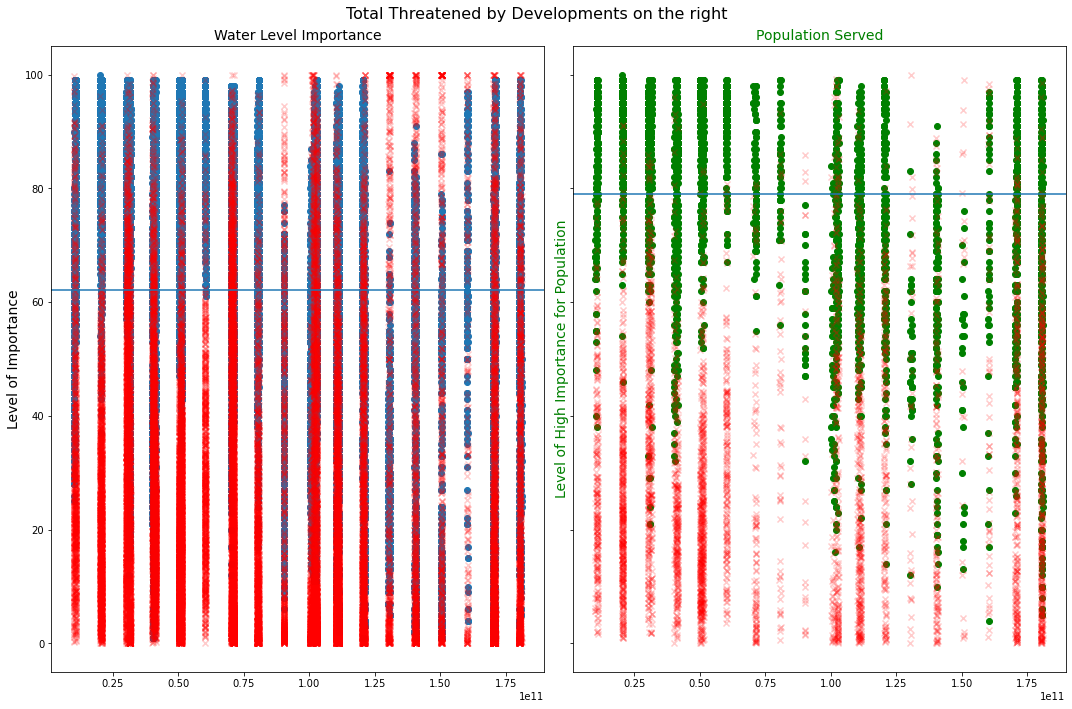

In [7]:
#50930 <- how many subregions have a swdli
#42432 <- how many of those sub regions are affected by development 
#4512 - how many of those subregions serve a population total - 
#4372 - how many of those subregion's forests to wli are highly threatened by developments. 

total = huc_area(df1, 100, 2000, 'IMP1')
total_dev = huc_area(total, 100, 2000, 'DEV_FOR3')
total_pop = huc_area(total, 100, 2000, 'POPSERVED')
total_pop_dev = huc_area(total_pop, 100, 2000, 'DEV_FOR3')
pop_served_graph('Total Threatened by Developments on the right', total_pop, total)

In [45]:
#42432 <- count of how many subregions are affacted by dev_for3
total_dev = list(pd.Series(huc_area(df1, 100, 2000, 'POPSERVED')['DEV_FOR3']))
total_dev_0 = list(pd.Series(huc_area_0(df1, 100, 2000, 'POPSERVED')['DEV_FOR3']))
#pop_served_graph('Total', total_pop, total)
#4372 <- where sdw has an importance variable above 0 and that serves a
                    #populations served where there is developmental threats. 
total_ttest = stats.ttest_ind(total_dev, total_dev_0)

total_ttest

Ttest_indResult(statistic=28.343839930957024, pvalue=4.302281841157898e-175)

In [43]:
#t test popserved vs not popserved
#power analysis stats models.stats.power


reg_1 = list(pd.Series(huc_area(df1, 100, 200, 'POPSERVED')['DEV_FOR3']))
reg_0 = list(pd.Series(huc_area_0(df1, 100, 200, 'POPSERVED')['DEV_FOR3']))
dev_ttest = stats.ttest_ind(reg_1, reg_0)

dic = {}
regions = {100: 'New England', 200: 'Mid-Atlantic', 300: 'South Atlantic-Gulf',400: 'Great Lakes', 500: 'Ohio', 600: 'Tennessee', 700: 'Upper Mississippi', 800: 'Lower Mississippi', 900: 'Souris-Red-Rainy', 1000: 'Missouri', 1100: 'Arkansas-White-Red', 1200: 'Texas-Gulf', 1300: 'Rio Grande', 1400: 'Upper Colorado', 1500: 'Lower Colorado', 1600: 'Great Basin', 1700: 'Pacific Northwest', 1800: 'California', 1900: 'Alaska'}
for k, v in regions.items():
    dic[v] = k
    
dic # -> reverse vals of 'regions'

regions_d = {k : None for k in dic}

def ttest_vals():
    lst = []
    lst2 = []
    final_lst = []
    lower = 100
    upper = 200 
    for x in range(18):
        lst.append(list(pd.Series(huc_area(df1, lower, upper, 'POPSERVED')['DEV_FOR3'])))
        lst2.append(list(pd.Series(huc_area_0(df1, lower, upper, 'POPSERVED')['DEV_FOR3'])))
        lower += 100
        upper += 100
    for i, j in zip(lst, lst2):
        t = stats.ttest_ind(i, j)
        final_lst.append(tuple(t))
    return final_lst

ttest_vals()
lst_vals =[]
for i in ttest_vals():
    if i[1] <= .05:
        lst_vals.append((i[0], i[1], True))
    else:
        lst_vals.append((i[0], i[1], False))
        
lst_vals



[(-2.31960210187591, 0.020532416440581326, True),
 (4.319089612163885, 1.629604858684857e-05, True),
 (7.545857168623287, 5.5483566610056584e-14, True),
 (1.2901433448781505, 0.19707989350989413, False),
 (9.55551058464718, 1.8476492632902674e-21, True),
 (1.0444986969242611, 0.2964942121640802, False),
 (-0.5920575139947291, 0.5538388456207313, False),
 (11.067548711330199, 1.2967477047782184e-27, True),
 (2.5598465946142523, 0.010668059167972156, True),
 (7.819844614694223, 6.437118655532809e-15, True),
 (7.779423051221757, 9.395096172003982e-15, True),
 (4.409356648586536, 1.0889434204751901e-05, True),
 (4.332574194276482, 1.7085503321471137e-05, True),
 (4.5302036370366565, 6.556178375874986e-06, True),
 (0.44909143939983037, 0.6535246795550879, False),
 (3.2285432373425897, 0.0014418617361486522, True),
 (10.809388811750486, 1.1468350673967773e-26, True),
 (3.7468107897767156, 0.0001860198764681018, True)]

In [ ]:
'''df1['threats_per'] = df1['PER_INSEC3'] + df1['PER_DEV3'] + df1['PER_FIRE3']
# Total percentage of threats added together from Insect/Disease, Development & Fire. 

df1['per_forest'] = df1['PER_NFS2'] + df1['PER_PRI2'] + df1['PER_PRONF2'] + df1['PER_FOR2']
# Total Percentage of forest within a subregion, there is overlap with protected/private and national forests
    #and because I do not have the raw data I can not parse through to see where the overlap is. 
    
df = df1[(df1['per_forest'] > 0) & (df1['threats_per'] > 0)] # becomes 61870 rows of data
# Collecting rows that do not have zero values in all the columns of either the threats to forests or percent of forest
df'''